# 数学建模概述

## 数学建模分类
1. 监督学习  
**监督学习**是通过**已有的训练样本**(包含features&target)去训练得到一个最优模型，再利用这个模型将所有的输入映射为相应的输出。  
监督学习根据输出数据分为**回归(Regression)** 和 **分类(Classfication)**。  
回归问题通常输出一个连续的数值，分类问题通常输出几个特定的数值。
    * 回归 --> 线性回归
    * 分类 --> KNN最近邻分类
    
    
2. 非监督学习  
**非监督学习**根据**类别未知的训练样本**(包含features，没有target)解决模式识别中的各种问题，主要为**聚类(Cluster Analysis)。
    * 聚类
        * PCA主成分分析
        * K-means聚类
    
    
3. 随机算法
    * 蒙特卡洛模拟

# 线性回归
1. 在统计学中，**回归分析(Regression Analysis)**指的是确定两种或以上变量间相互依赖的定量关系的一种统计分析方法
2. 按照自变量和因变量的关系类型，分为**线性回归分析**和**非线性回归分析**
3. 线性回归(Linear Regression)通常是预测模型时是首选的技术之一。在这种技术中，因变量是连续的，自变量可连续可离散，回归线的性质是线性的
4. 线性回归使用**最佳的拟合直线**(回归线)在**因变量(Y)**和自变量(x)之间建立一种关系。  
    * 简单线性回归(一元线性回归)表示为：$ Y=a+b*x $
    * 多元线性回归可表示为：$ Y=a+b_1*x_1+b_2*x_2 $

## 线性回归理论概述
1. 现有一个房源样本数据，包含四个字段：编号、建筑面积、物业费、总价。现需要通过现有数据找到**总价**同**建筑面积&物业费**之间的线性关系，使得可以在给定“建筑面积”&“物业费”的情况下，预测“总价”
    * 数据属性features：建筑面积、物业费
    * 目标target：总价
    * 找到线性关系：$ 总价=因子_1*建筑面积+因子_2*物业费+回归系数+误差 $


2. 误差项
    * **误差项(error)**也称随机扰动项，是线性回归模型不能解释的部分，为拟合直线同样本值的误差。
    * 线性回归模型的确定需要满足：样本值和拟合值的误差求和最小。所以**误差项\varepsilon是一个期望值为0的随机变量**
    * 误差项\varepsilon要求：每一个$\varepsilon$相互独立，且服从均值为0，方差为$\sigma^2$的正态分布。均值为0意义在于使得$\varepsilon$求和为0
    $$ y_(i) = \theta^Tx^{(i)}+\varepsilon^{(i)}, \varepsilon-N(0, \sigma^2) $$
    * 拟合直线不要求完全服从期望值为0的正态分布，但要求尽量趋近
    * 最小二乘法求解
    $$ J(\theta) = \cfrac{1}{2} \sum_{i=0}^{n}(h_\theta(X^{(i)})-y^{(i)})^2 $$
    

3. 线性回归求解
    * 目标函数
    $$ J(\theta) = \cfrac{1}{2} \sum_{i=0}^{n}(h_\theta(X^{(i)})-y^{(i)})^2
        = \cfrac{1}{2}(x_\theta-y)^T(X_\theta-y)  $$
    * 求偏导，当偏导为0时$J(\theta)$最小，推导出
    $$ \theta = (X^TX)^{-1}X^Ty $$
    * $X^T$和y来源于样本数据，可求出$\theta$
    * python实现：**sklearn.LinearRegression**

## sklearn.linear_model.LinearRegression

### 一元线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # 线性回归模块
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

查看斜率: [4.13452413]
查看截距: 21.42978498293081


Text(0.5, 1.0, '误差')

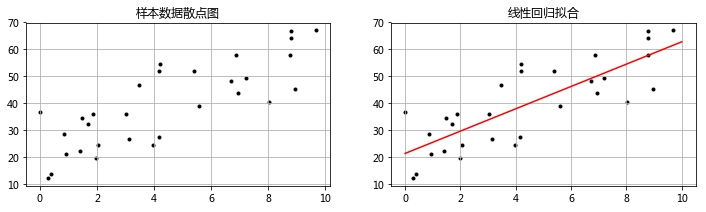

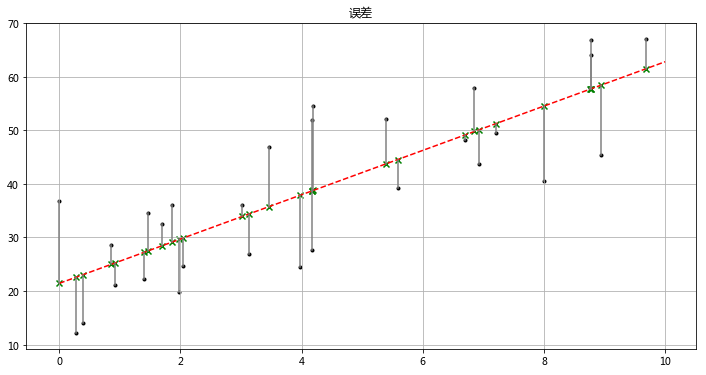

In [2]:
rng = np.random.RandomState(1) # 设定随机数种子
train_x = 10 * rng.rand(30)
train_Y = 8 + 4*train_x + rng.rand(30)*30

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(1, 2, 1)
plt.scatter(train_x, train_Y, marker='.', color='K')
plt.grid()
plt.title('样本数据散点图')

# 创建线性回归模型
model = LinearRegression()
model.fit(train_x[:, np.newaxis], train_Y) # 传入参数，需要注意只接受一维数组
print('查看斜率:', model.coef_)
print('查看截距:', model.intercept_)

# 测试
test_x = np.linspace(0, 10, 1000)
test_Y = model.predict(test_x[:, np.newaxis]) # 使用新数据预测
pred_train_Y = model.predict(train_x[:, np.newaxis]) # 使用训练样本数据预测

ax2 = fig.add_subplot(1, 2, 2)
plt.scatter(train_x, train_Y, marker='.', color='K')
plt.plot(test_x, test_Y, color='r')
plt.grid()
plt.title('线性回归拟合')

fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 1, 1)
plt.plot(test_x, test_Y, color='r', linestyle='--') # 拟合直线
plt.scatter(train_x, train_Y, marker='.', color='K') # 样本数据散点图
plt.scatter(train_x, pred_train_Y, marker='x', color='g') # 样本数据预测散点图
plt.plot([train_x, train_x], [train_Y, pred_train_Y], color='gray') # 误差线
plt.grid()
plt.title('误差')

### 多元线性回归
多元线性回归同一元线性回归的区别在于其传入多个features，有多个自变量x

斜率为： [ 1.5  2.  -4.   3. ]
截距为：20.0000
线性回归函数为：Y = 1.5x1 + 2.0x2 + -4.0x3 + 3.0x4


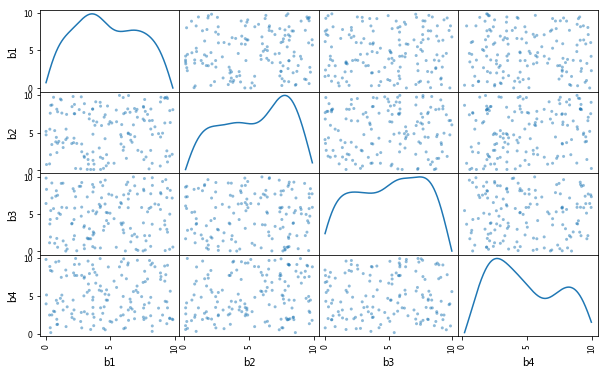

In [3]:
# 训练样本
rng = np.random.RandomState(5)
train_x = 10 * rng.rand(150, 4) # 创建四组数据，即四个features
train_Y = 20 + np.dot(train_x, [1.5, 2, -4, 3])
df = pd.DataFrame(train_x, columns=['b1', 'b2', 'b3', 'b4'])
df['Y'] = train_Y
df.head()

# 通过散点图查看各features间的关系，可用于查看features之间相关程度-->降维
pd.scatter_matrix(df[['b1', 'b2', 'b3', 'b4']], figsize=(10, 6),
                 diagonal='kde', alpha=0.5, range_padding=0.1)

# 拟合多元回归
model = LinearRegression()
model.fit(df[['b1', 'b2', 'b3', 'b4']], df['Y'])

print('斜率为：', model.coef_)
print('截距为：%.4f' %model.intercept_)
print('线性回归函数为：Y = %.1fx1 + %.1fx2 + %.1fx3 + %.1fx4'
     % (model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

## 线性回归模型评估
* SSE(和方差/误差平方和)
* MSE(均方差/方差)
* RMSE(均方根/标准差)
* R-square(确定系数)

**常用：$R^2$接近于1，MSE接近于0**  
**常用于不同模型之间进行相互比较，挑选更优的模型**

### SSE (The Sum of Squares due to Error)
1. 误差平方和SSE计算的是拟合数据和原始数据对应点的**误差的平方和**，公式为
$$ SSE = \sum_{i=1}^{n}w_i(y_i-\hat y_i)^2 $$
2. SSE越接近于0，说明模型选择和拟合更好，数据预测更成功

### MSE均方差
MSE是预测数据和原始数据对应点**误差的平方和的均值**，也就是SSE/n，和SSE没有太大区别。公式为
$$ MSE=\cfrac{SSE}{n} = \cfrac{1}{n}\sum_{i=1}^{n}(w_i(y_i-\hat y_i)^2 $$

### RMSE均方根
RSME也叫回归系统的拟合标准差，是**MSE的平方根**。公式为
$$ RMSE = \sqrt[2]{MSE} = \sqrt[2]{\cfrac{SSE}{n}} = \sqrt[2]{\cfrac{1}{n}\sum_{i=1}^{n}(w_i(y_i-\hat y_i)^2} $$

### R-square确定系数
1. SSR(Sum of Square of the Regression)，预测数据与原始数据均值之差的平方和
$$ SSR = \sum_{i=1}^{n}w_i(\hat y_i-\bar y_i)^2 $$
2. SST(Total Sum of Squares)，原始数据和均值之差的平方和
$$ SST = \sum_{i=1}^{n}w_i(y_i-\hat y_i)^2 $$
注：**SST = SSE + SSR**
3. R-square，确定系数为SSR/SST
$$ R-square = \cfrac{SSR}{SST} = \cfrac{SST-SSE}{SST} = 1-\cfrac{SSE}{SST} $$
    * SSR为模型可解释部分，SSE为模型未解释部分
    * 确定系数取值范围为**[0, 1]**，越接近1，模型解释能力越强，拟合越好

In [4]:
from sklearn import metrics

# 创建数据
rng = np.random.RandomState(1)
train_x = 10 * rng.rand(30)
train_Y = 8 + 4*train_x + rng.rand(30)*3

# 拟合
model = LinearRegression()
model.fit(train_x[:, np.newaxis], train_Y)
pred = model.predict(train_x[:, np.newaxis]) # 预测

# 评价指标
MSE = metrics.mean_squared_error(train_Y, pred) # MSE
RMSE = np.sqrt(MSE) # RMSE
SSR = ((pred-train_Y.mean())**2).sum() # SSR
SST = ((train_Y-train_Y.mean())**2).sum() # SST
R2 = SSR/SST # R-square
R22 = model.score(train_x[:, np.newaxis], train_Y) # sklearn内置也可以计算R-square
print('MSE:', MSE)
print('RMSE:', RMSE)
print('R-square:', R2)
print('R-square-sklearn:', R22)

MSE: 0.784706851772712
RMSE: 0.8858368087705049
R-square: 0.9946452159695
R-square-sklearn: 0.9946452159694995


# KNN最近邻分类
1. **分类(Classification)**指的是从数据中选出已经分好类的训练集，在该训练集上运用数据挖掘分类的技术，建立分类模型，**对于没有分类的数据进行分类**的分析方法
2. **分类**应用场景：**分类问题用于将事物打上一个标签**，通常结果为离散值。例如判断一幅图片上的动物是猫还是狗。**分类通常建立在回归之上**
3. **KNN最近邻分类**简称KNN，是最简单的机器学习算法之一。  
其核心逻辑在于：在距离空间内，如果一个样本的最接近的k个邻居里绝大多数属于某个类别，那么该样本也属于这个类别

## KNN距离计算公式
对于具有features数量为2的样本数据，对每条数据进行计算它与(x1, y1)的距离：
$$ E(x, y) = \sqrt[2]{(x_2-x_1)^2+(y_2-y_1)^2} $$
对features数量为n的样本数据：
$$ x = \sqrt[2]{\sum_{i=0}^{n}(x_i-y_i)^2} $$
* sklearn.neighbors

## sklearn.neighbors.KNeighborsClassifier

      name  fight  kiss     type
0  北京遇上西雅图      3   104  romance
1      喜欢你      2   100  romance
2    疯狂动物城      1    81  romance
3      战狼2    101    10   action
4       力王     99     5   action
5      敢死队     98     2   action

预测为: ['romance']


Text(18, 90, '<你的名字>')

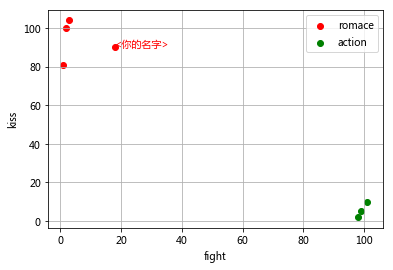

In [5]:
from sklearn import neighbors

data = pd.DataFrame({
    'name': ['北京遇上西雅图', '喜欢你', '疯狂动物城', '战狼2', '力王', '敢死队'],
    'fight': [3, 2, 1, 101, 99, 98],
    'kiss': [104, 100, 81, 10, 5, 2],
    'type': ['romance', 'romance', 'romance', 'action', 'action', 'action']
    })
print(data)

plt.scatter(data[data['type']=='romance']['fight'], data[data['type']=='romance']['kiss'], color='r', label='romace')
plt.scatter(data[data['type']=='action']['fight'], data[data['type']=='action']['kiss'], color='g', label='action')
plt.grid()
plt.legend()

KNN = neighbors.KNeighborsClassifier() # KNN分类
KNN.fit(data[['fight', 'kiss']], data['type'])

pred = KNN.predict(np.reshape([18, 90], (1, -1)))
print('\n预测为:', pred)
plt.scatter(18, 90, color='r', label='romance')
plt.ylabel('kiss')
plt.xlabel('fight')
plt.text(18, 90, '<你的名字>', color='r')

       fight       kiss     pred
0  49.799295  36.005295   action
1  19.308795  48.282126  romance
2  27.855062  33.554016  romance
3  28.894084  15.357309   action
4  40.994243  46.710663  romance


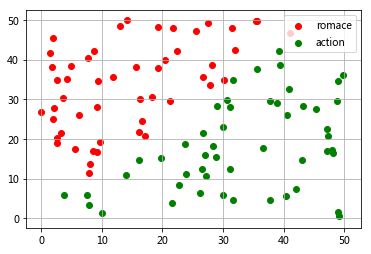

In [6]:
# 使用随机数据进行预测
data2 = pd.DataFrame(np.random.rand(100, 2)*50, columns=['fight', 'kiss'])
data2['pred'] = KNN.predict(data2[['fight', 'kiss']])
print(data2.head())

plt.scatter(data2[data2['pred']=='romance']['fight'], data2[data2['pred']=='romance']['kiss'], color='r', label='romace')
plt.scatter(data2[data2['pred']=='action']['fight'], data2[data2['pred']=='action']['kiss'], color='g', label='action')
plt.grid()
plt.legend()

In [7]:
# iris数据测试

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print('数据长度为：%i条' %len(iris['data']))
data = pd.DataFrame(iris.data, columns=iris.feature_names) # features
data['target'] = iris.target # target
data.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
数据长度为：150条


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
KNN = neighbors.KNeighborsClassifier()
KNN.fit(iris.data, iris.target)

pred = KNN.predict(np.reshape([3.2, 3.7, 1.3, 0.4], (1, -1)))
print('预测为：', pred)

预测为： [0]


# 聚类分析
1. **聚类分析(Cluster Analysis)是一组将研究对象**分为相对同质的群组(Cluster)**的统计分析技术。它将观测对象的群体按照**相似性**和**相异性**进行不同群组的划分，划分后**每个群组内部各对象高度相似**，**不同群组间的对象高度相异**
2. **回归/分类/聚类**区分
    * 回归/分类 --> 监督学习，聚类 --> 无监督学习
    * 回归：产生连续结果，可用于预测
    * 分类；产生离散结果，可用于预测
    * 聚类：产生一组集合，可用于**降维**

## PCA主成分分析
1. **PCA主成分分析(Principal Component Analysis)**是最广泛的无监督算法+基础的降维算法


2. PCA通过**线性变换**将原始数据变换为一组各维度线性无关的表示，用于**提取数据的主要特征分量**(高维数据的降维)  
比如拿到一个样本，特征很多而特例很少，使用回归去直接拟合会非常困难，其计算复杂度大且容易过拟合。所以需要降维，将多维度变为核心的几个维度后再进行回归


3. PCA的目的  
对于原本数据中的所有变量，将重复的变量(关系紧密的特征)删去多余项，建立尽可能少的新变量，使得这些**新变量是两两不相关的，并且新变量在反映的信息方面尽可能保持原有的信息**。
    * 新的变量由多个旧变量组成，不一定能以旧变量的含义来描述新变量
    * 一般**降维**是为了更好的做**回归/分类**，所以PCA是一个过程结果用于辅助构建模型


4. 主成分的筛选
    * 将原样本数据从100个变量降为10个新变量，这10个新变量分别由100个旧变量组成。
    * $ a_1b_1+a_2b_2+a_3b_3+...+a_{10}b_{10} $中，b1~b10按照从大到小排列，做累计求和 ---> **贡献率**
    * 一般选取**贡献率达到85%**以上(甚至95%)的成分作为主要成分  
    比如筛选后，b1、b2、b3的累计贡献率超过85%，则选取a1、a2、a3作为该样本数据的主成分，从而实现降维


5. 求解步骤
    * 计算数据的协方差矩阵
    * 计算协方差矩阵的**特征值**和**特征向量**
    * 特征值从大到小排列
    * 筛选主成分，并将数据转换到特征向量构建的**新空间**中

### sklearn.decomposition.PCA
1. sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
    * n_components：PCA算法中所要保留的主成分个数n，即降为n维
    * copy：默认为True，在运行算法时将原始训练数据复制一份
    * PCA.fit(X, y=None)：用X进行训练
2. 使用方法
    * 使用PCA，.fit()进行训练，再使用.transform()输出降维后的值
    * 或者使用.fit_transform()，训练并输出降维后的值

#### 二维数据降维

         X1        X2
0 -1.174787 -1.404131
1 -1.374449 -1.294660
2 -2.316007 -2.166109
3  0.947847  1.460480
4  1.762375  1.640622


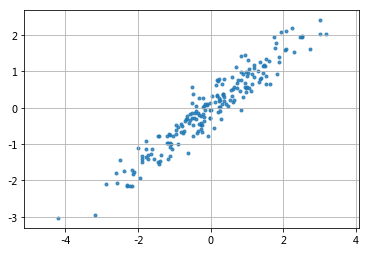

In [9]:
# 创建数据
rng = np.random.RandomState(8)
data = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T # np.dot矩阵相乘
df = pd.DataFrame({
    'X1': data[:, 0],
    'X2': data[:, 1]
    })
print(df.head())
plt.scatter(df['X1'], df['X2'], alpha=0.8, marker='.')
plt.axis('equal')
plt.grid()

特征值: [2.79699086]
特征向量: [[-0.7788006  -0.62727158]]
降维后维度: 1
原始数据形状 (200, 2)
转换后数据形状 (200, 1)


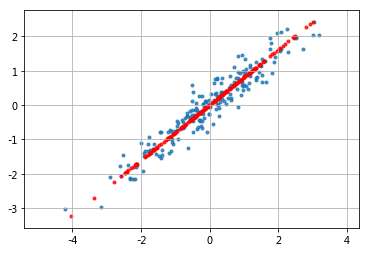

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 降为1维
pca.fit(df) # 构建模型

print('特征值:', pca.explained_variance_)
print('特征向量:', pca.components_)
print('降维后维度:', pca.n_components_)
# 降维后主成分A1 = 2.78 * (-0.779*x1-0.627*x2)

a1 = pca.transform(df) # 转换后主成分A1的值
old = pca.inverse_transform(a1) # 将降维后的数据转换为原始数据
print('原始数据形状', df.shape)
print('转换后数据形状', a1.shape)

plt.scatter(df['X1'], df['X2'], alpha=0.8, marker='.')
plt.scatter(old[:, 0], old[:, 1], alpha=0.8, marker='.', color='r')
plt.axis('equal')
plt.grid()

#### 多维数据降维

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print('数据长度:', len(digits['data']))
print('数据形状:', digits.data.shape)

pca = PCA(n_components=10) # 降为10维
projected = pca.fit_transform(digits.data) # 训练并输出降维后的值
print(projected[:5])
print('\n特征值:', pca.explained_variance_)
print('\n特征向量:', pca.components_)
print('降维后维度:', pca.n_components_)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度: 1797
数据形状: (1797, 64)
[[ -1.2594794   21.27484284  -9.46288096  13.01319804  -7.13161176
   -7.43774924   3.24962252   2.56688647  -0.59583655   3.61878521]
 [  7.95758725 -20.76862833   4.43921099 -14.89337801   5.89779257
   -6.49931145   2.11464065  -4.60791161   3.57441561  -1.04884561]
 [  6.99191747  -9.95603274   2.9589324  -12.29016631 -18.1310159
   -4.49108369   1.8420726  -16.40673553   0.71614376   4.21800725]
 [-15.90607971   3.33244801   9.82441299 -12.27522371   6.96630354
    1.0958448   -1.03226523  10.95654969  -3.23756235   6.49408952]
 [ 23.30689621   4.26901305  -5.67544087 -13.85037276  -0.35651625
   -2.8698733   -0.72443245  13.04123871  -3.83639553  13.46247939]]

特征值: [179.0069301  163.71774688 141.78843902 101.10037403  69.51315785
  59.10847446  51.88450182  44.01470222  40.31047024  37.0113912 ]

特征向量: [[-5.51037732e-17 -1.73094474e-02 -2.23428837e-01 -1.35913343e-01
  -3.30324636e-02 -9

            b     b_sum
0  179.006930  0.201708
1  163.717747  0.386188
2  141.788439  0.545957
3  101.100374  0.659879
4   69.513158  0.738207


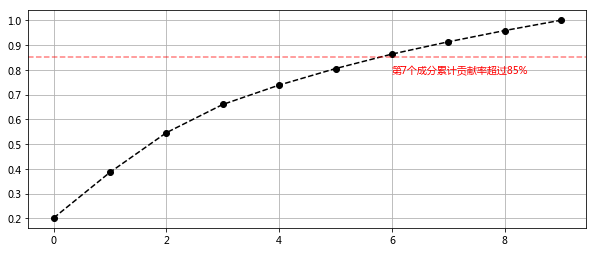

In [12]:
# 主成分选取

s = pca.explained_variance_
c_s = pd.DataFrame({
    'b': s,
    'b_sum': s.cumsum()/s.sum() # 占比/贡献率
    })
print(c_s.head())
c_s['b_sum'].plot(style='--ko', figsize=(10, 4))
plt.axhline(0.85, color='r', linestyle='--', alpha=0.5)
plt.text(6, c_s['b_sum'].iloc[6]-0.08, '第7个成分累计贡献率超过85%', color='r')
plt.grid()

## K-means聚类
1. **K-means**是最常用的机器学习聚类算法，也是典型的**基于距离的聚类算法**。基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇，以**欧式距离**为相似度测度

 
2. K-means算法需要输入**待聚类的数据**和**欲聚类的簇数K**，主要过程如下：
    * 随机生成K个初始点作为质心
    * 将数据值的数据**按照距离质心的远近分到各个簇中**
    * **将各个簇中的数据求平均值，作为新的质心**，重复迭代直到**所有的簇不再改变**
    
    
3. 注意事项
    * 簇数量需要先给定，再进行聚类
    * 不适用于非线性边界
    * 数据量较大时计算慢

* 创建数据
x, y = make_blobs(n_samples, n_features, centers, cluster_std, random_state)
    * n_samples：生成的样本总数
    * n_features：每个样本的特征数
    * centers：类别数
    * cluster_std：每个类别的方差。可对每类数据设置对应的方差，如二类数据设置为[1.0, 3.0]
    * random_state：随机数种子
    * x：生成的数据值
    * y：生成数据对应的类别标签

生成数据:
 [[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]]
类别标签: [1 3 0 3 1]


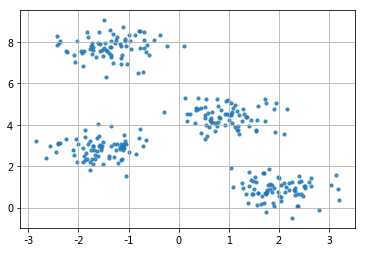

In [17]:
# 创建数据
from sklearn.datasets.samples_generator import make_blobs # 聚类数据生成器

# 生成数据：300条数据，分四类，方差一致
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
print('生成数据:\n', x[:5])
print('类别标签:', y_true[:5])
plt.scatter(x[:, 0], x[:, 1], s=10, alpha=0.8)
plt.grid()

训练后的分类:
 [3 2 0 2 3 3 1 0 2 2 1 2 0 2 3 0 0 3 1 1 3 3 0 1 1 0 3 0 1 0 2 2 0 2 2 2 2
 2 1 3 0 1 0 0 1 1 2 1 2 3 1 3 2 3 3 1 2 1 2 3 2 0 2 1 1 1 2 3 2 1 0 1 2 1
 1 2 1 0 3 2 3 0 3 3 2 0 3 0 2 2 0 3 2 1 1 0 3 3 0 1 2 3 2 3 0 3 3 0 2 0 1
 1 3 2 3 0 2 3 3 0 1 3 1 3 3 3 3 1 3 1 2 1 1 3 2 1 1 2 0 2 2 1 0 1 0 1 2 0
 2 2 2 0 2 0 3 1 2 1 3 0 2 0 0 3 0 1 1 0 3 0 0 2 3 0 1 2 3 3 0 1 3 0 1 1 0
 0 0 0 3 2 0 1 0 0 1 1 1 0 1 2 0 1 3 1 0 2 1 2 0 2 0 1 0 0 2 1 1 3 3 0 2 3
 3 1 3 1 0 2 2 0 0 2 0 3 1 0 3 1 2 1 3 0 3 2 2 2 2 1 1 2 0 1 3 0 1 1 1 3 3
 2 0 0 1 3 2 1 0 2 0 3 3 1 1 0 3 3 3 0 2 2 3 3 0 3 3 3 2 1 2 0 3 3 2 2 2 3
 3 0 2 1]
各中心点的数据:
 [[ 0.95415778  4.39985544]
 [-1.57480456  2.84532424]
 [-1.35241261  7.76731726]
 [ 1.99469693  0.8727049 ]]


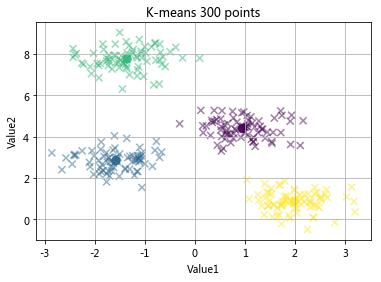

In [25]:
# K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # 4类别的数据/4簇
kmeans.fit(x)
y_kmeans = kmeans.predict(x) # 使用训练的聚类模型进行分类，返回各数据对应标签
print('训练后的分类:\n', y_kmeans)
centroids = kmeans.cluster_centers_ # 4个中心点的数据
print('各中心点的数据:\n', centroids)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, alpha=0.5, marker='x')
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2,3], s=70, marker='o', alpha=0.9)
plt.title('K-means 300 points')
plt.xlabel('Value1')
plt.ylabel('Value2')
plt.grid()

# 蒙特卡洛模拟
1. **蒙特卡洛模拟(Monte Carlo)**又称**随机抽样**或**统计试验方法**，是以概率和统计理论方法为基础的一种计算方法。它使用**随机数**(或更常见的伪随机数)来解决很多计算问题的方法。它将所求解的问题统一定的概率模型相联系，用计算机实现统计模拟或抽样以获得问题的近似解


2. 基本原理  
蒙特卡洛方法通过抓住事物运动的**几何数量**和**几何特征**，通过数学方法来加以模拟，即进行一种数字模拟试验。**它是以一个概率模型为基础**，按照这个模型所描绘的过程，通过模拟试验的结果，作为问题的**近似解**。  


3. 蒙特卡洛方法有三个主要步骤:
    * 构建或描述概率过程
    * 实现从已知概率分布抽样
    * 建立各种估计量   
    
    
4. 借助计算机技术，蒙特卡洛实现了两大优点：
    * 简单，省却了繁复的数学推导和演算过程，使得一般人也能够理解和掌握
    * 快速实现  
    
    
5. 蒙特卡洛方法的特点：  
**在随机采样上计算得到近似结果。随着采样的增多，得到结果是正确结果的概率逐渐加大**

[-0.35706962  0.5762466   0.24738091 ... -0.10583512 -0.15394976
 -0.61647992] [ 0.01683335  0.70839661  0.74271748 ... -0.84262598 -0.46608943
  0.09101928]
落在圆内的点的数量: 7834
预测pi为: 3.1336


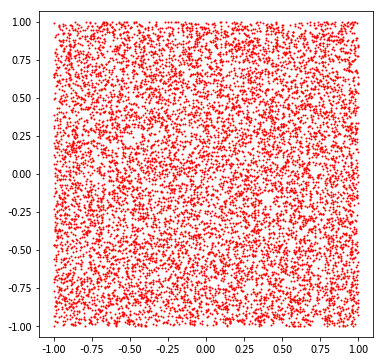

In [41]:
# 案例：求解随机丢一个点，落在圆中的概率

n = 10000 # 1W次模拟
r = 1.0 # 圆半径为1
a, b = (0.0, 0.0) # 圆心
xmin, xmax = a-r, a+r # 正方形的长
ymin, ymax = b-r, b+r # 正方形的宽

x = np.random.uniform(xmin, xmax, n) # 横坐标落于正方形之间
y = np.random.uniform(ymin, ymax, n) # 纵坐标落于正方形之间
print(x, y)

fig = plt.figure(figsize=(6, 6))
axes = fig.add_subplot(1, 1, 1)
plt.plot(x, y, 'ro', markersize=1)
plt.axis('equal')

# 判断点是否在圆内：计算该点同圆心的距离，同半径r比较
d = np.sqrt((x-a)**2 + (y-b)**2) # 计算距离
res = sum(np.where(d<r, 1, 0))
print('落在圆内的点的数量:', res)
print('预测pi为:', 4*res/n)